# 202001549 장희권

In [6]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
station_files = glob('지역*.xls')

In [8]:
tmp_list = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_list.append(tmp)

In [21]:
stations = pd.concat(tmp_list)
stations

지역                     상호                       주소      상표  \
0   인천광역시                원천제2주유소           인천 계양구 벌말로 295   알뜰주유소   
1   인천광역시  현대오일뱅크(주)직영 계양IC셀프주유소  인천 계양구 서부간선로 250  (박촌동)  현대오일뱅크   
2   인천광역시                  그린에너지            인천 계양구 솔고개길 2   S-OIL   
3   인천광역시                  박촌주유소    인천 계양구 장제로 1021 (박촌동)  현대오일뱅크   
4   인천광역시          서일석유(주) 갈현주유소    인천 계양구  드림로 764 (갈현동)   GS칼텍스   
..    ...                    ...                      ...     ...   
22  인천광역시                  세광주유소       인천 강화군 선원면 중앙로 205   S-OIL   
23  인천광역시                  한국주유소       인천 강화군 선원면 중앙로 445    자가상표   
24  인천광역시                  교동주유소    인천 강화군 교동면 대룡안길54번길 5   GS칼텍스   
25  인천광역시               백마외포리주유소      인천 강화군 내가면 중앙로 1301   S-OIL   
26  인천광역시                  양갑주유소      인천 강화군 교동면 교동서로 274   SK에너지   

            전화번호 셀프여부 고급휘발유   휘발유    경유  실내등유  
0   032-555-9143    Y     -  1573  1835     -  
1   032-552-5185    Y  1999  1583  1864     -  
2   032-584-5189    N     -  1584  1864  1650  
3   032-519-9922    Y     -  1585  1856     -  
4   032-513-8903    N     -  1595  1865     -  
..           ...  ...   ...   ...   ...   ...  
22  032-934-1235    N     -  1699  1899  1550  
23  032-933-8700    N     -  1719  1899  1600  
24  032-932-5039    N     -  1720  1995  1600  
25  032-933-8155    N     -  1790  1998  1690  
26  032-933-8126    N     -  1795  1990  1695  

[319 rows x 10 columns]

In [28]:
stations_sel = stations.loc[:, ['상호', '주소', '상표', '셀프여부', '휘발유', '경유']]
stations_sel = stations_sel.query("휘발유 != '-'").copy()
stations_sel = stations_sel.query("경유 != '-'").copy()
stations_sel

상호                       주소      상표 셀프여부   휘발유    경유
0                 원천제2주유소           인천 계양구 벌말로 295   알뜰주유소    Y  1573  1835
1   현대오일뱅크(주)직영 계양IC셀프주유소  인천 계양구 서부간선로 250  (박촌동)  현대오일뱅크    Y  1583  1864
2                   그린에너지            인천 계양구 솔고개길 2   S-OIL    N  1584  1864
3                   박촌주유소    인천 계양구 장제로 1021 (박촌동)  현대오일뱅크    Y  1585  1856
4           서일석유(주) 갈현주유소    인천 계양구  드림로 764 (갈현동)   GS칼텍스    N  1595  1865
..                    ...                      ...     ...  ...   ...   ...
22                  세광주유소       인천 강화군 선원면 중앙로 205   S-OIL    N  1699  1899
23                  한국주유소       인천 강화군 선원면 중앙로 445    자가상표    N  1719  1899
24                  교동주유소    인천 강화군 교동면 대룡안길54번길 5   GS칼텍스    N  1720  1995
25               백마외포리주유소      인천 강화군 내가면 중앙로 1301   S-OIL    N  1790  1998
26                  양갑주유소      인천 강화군 교동면 교동서로 274   SK에너지    N  1795  1990

[316 rows x 6 columns]

In [29]:
# split() 이용해 군/구 정보만 추출
gu_list = []

for address in stations_sel['주소']:
    address_gu = address.split()[1]
    gu_list.append(address_gu)

stations_sel['군/구'] = gu_list

In [30]:
stations_sel

상호                       주소      상표 셀프여부   휘발유    경유  \
0                 원천제2주유소           인천 계양구 벌말로 295   알뜰주유소    Y  1573  1835   
1   현대오일뱅크(주)직영 계양IC셀프주유소  인천 계양구 서부간선로 250  (박촌동)  현대오일뱅크    Y  1583  1864   
2                   그린에너지            인천 계양구 솔고개길 2   S-OIL    N  1584  1864   
3                   박촌주유소    인천 계양구 장제로 1021 (박촌동)  현대오일뱅크    Y  1585  1856   
4           서일석유(주) 갈현주유소    인천 계양구  드림로 764 (갈현동)   GS칼텍스    N  1595  1865   
..                    ...                      ...     ...  ...   ...   ...   
22                  세광주유소       인천 강화군 선원면 중앙로 205   S-OIL    N  1699  1899   
23                  한국주유소       인천 강화군 선원면 중앙로 445    자가상표    N  1719  1899   
24                  교동주유소    인천 강화군 교동면 대룡안길54번길 5   GS칼텍스    N  1720  1995   
25               백마외포리주유소      인천 강화군 내가면 중앙로 1301   S-OIL    N  1790  1998   
26                  양갑주유소      인천 강화군 교동면 교동서로 274   SK에너지    N  1795  1990   

    군/구  
0   계양구  
1   계양구  
2   계양구  
3   계양구  
4   계양구  
..  ...  
22  강화군  
23  강화군  
24  강화군  
25  강화군  
26  강화군  

[316 rows x 7 columns]

In [24]:
stations_sel = stations_sel.query("가격 != '-'").copy()

UndefinedVariableError: name '가격' is not defined

In [25]:
price_list = []
for price in stations_sel['가격']:
    price_new = int(price)
    price_list.append(price_new)

stations_sel['가격'] = price_list

KeyError: '가격'

In [14]:
stations_sel.reset_index(inplace=True)

del stations_sel['index']

stations_sel_name = stations_sel.set_index('상표')
stations_sel_name

주유소                       주소 셀프여부    가격  군/구
상표                                                                    
알뜰주유소                 원천제2주유소           인천 계양구 벌말로 295    Y  1573  계양구
현대오일뱅크  현대오일뱅크(주)직영 계양IC셀프주유소  인천 계양구 서부간선로 250  (박촌동)    Y  1583  계양구
S-OIL                   그린에너지            인천 계양구 솔고개길 2    N  1584  계양구
현대오일뱅크                  박촌주유소    인천 계양구 장제로 1021 (박촌동)    Y  1585  계양구
GS칼텍스           서일석유(주) 갈현주유소    인천 계양구  드림로 764 (갈현동)    N  1595  계양구
...                       ...                      ...  ...   ...  ...
S-OIL                   세광주유소       인천 강화군 선원면 중앙로 205    N  1699  강화군
자가상표                    한국주유소       인천 강화군 선원면 중앙로 445    N  1719  강화군
GS칼텍스                   교동주유소    인천 강화군 교동면 대룡안길54번길 5    N  1720  강화군
S-OIL                백마외포리주유소      인천 강화군 내가면 중앙로 1301    N  1790  강화군
SK에너지                   양갑주유소      인천 강화군 교동면 교동서로 274    N  1795  강화군

[316 rows x 5 columns]

In [15]:
# matplotlib 설정하기
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

<AxesSubplot:title={'center':'가격'}, xlabel='셀프여부'>

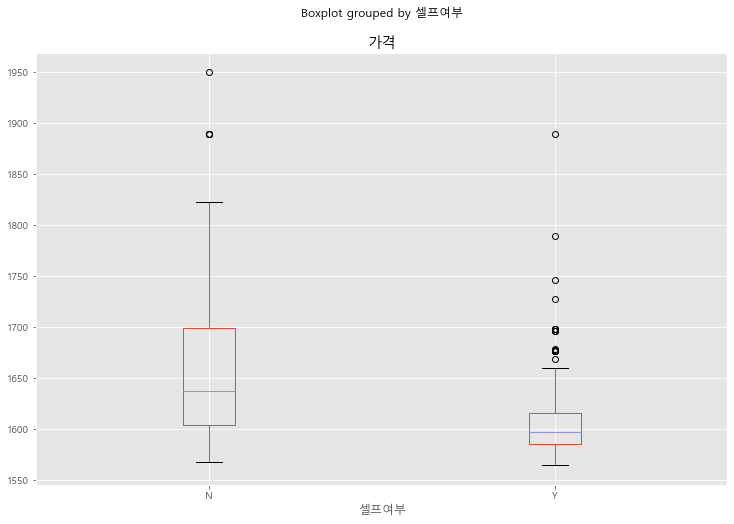

In [16]:
stations_sel.boxplot(column='가격', by='셀프여부', figsize=(12, 8))

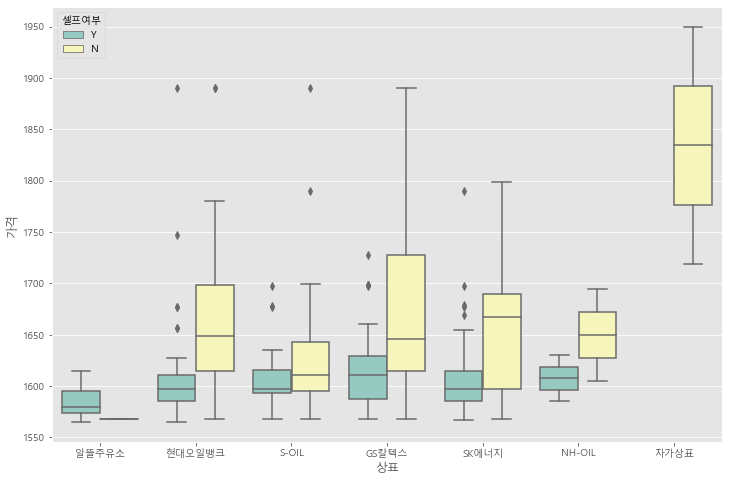

In [17]:
plt.figure(figsize=(12, 8))

# hue -> 색상
sns.boxplot(x="상표", y="가격", hue="셀프여부", data=stations_sel, palette="Set3")
plt.show()

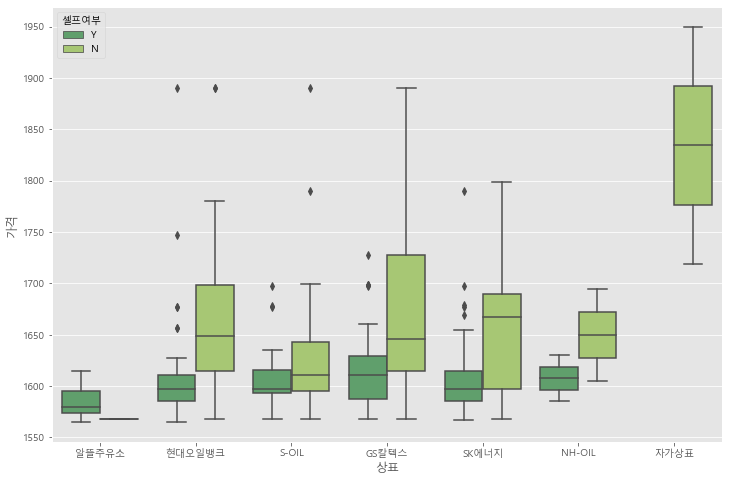

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", hue="셀프여부", data=stations_sel, palette="summer")
plt.show()

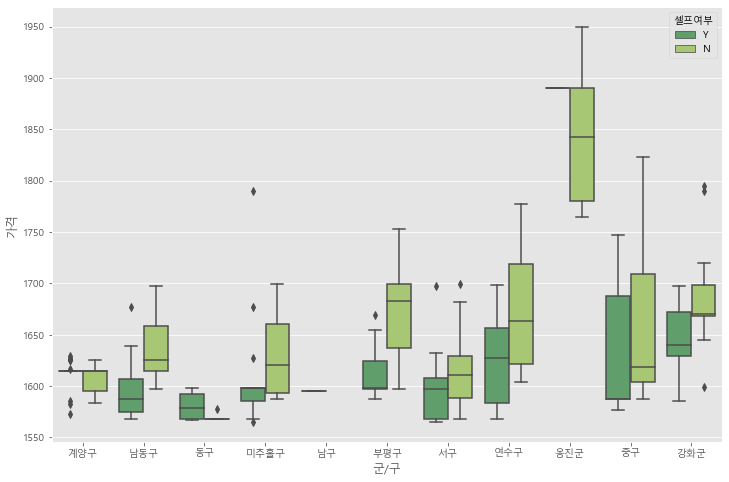

In [19]:
plt.figure(figsize=(12, 8))

# hue -> 색상
sns.boxplot(x="군/구", y="가격", hue="셀프여부", data=stations_sel, palette="summer")
plt.show()